<a href="https://colab.research.google.com/github/digs1998/Image-Segmentation-Tutorials/blob/main/Image_Segmetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
from scipy import ndimage 
import matplotlib.pyplot as plt
%matplotlib inline

(168, 300, 3)


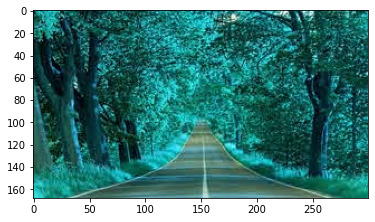

In [ ]:
img = cv2.imread('/content/download.jfif')
print(img.shape)
plt.imshow(img)

(168, 300)


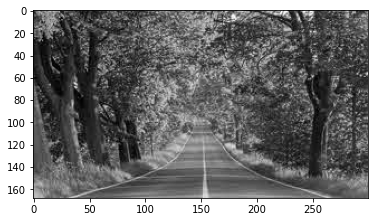

In [ ]:
gray = rgb2gray(img)
plt.imshow(gray, cmap='gray')
print(gray.shape)

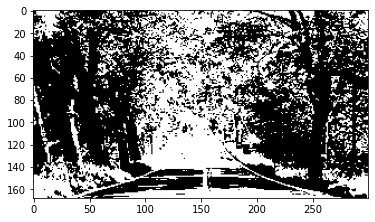

In [ ]:
#height and width is 533 and 800 so let's take mean of this as threshold
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

for i in range(gray_r.shape[0]):
  if gray_r[i]>gray_r.mean():
    gray_r[i]=1
  else:
    gray_r[i]=0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray,cmap='gray')

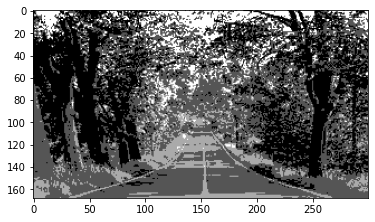

In [ ]:
#multiple thresholds to define multiple objects
gray = rgb2gray(img)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

Edge Segmentation

In [ ]:
#weight matrix will be used in this, sobel operator will be our weight matrix

sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [ ]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

Horizontal Edges

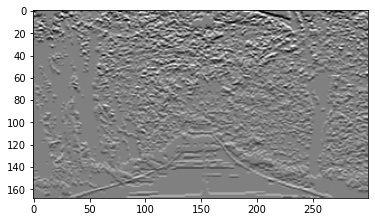

In [ ]:
plt.imshow(out_h,cmap='gray')
plt.show()

Vertical Edges

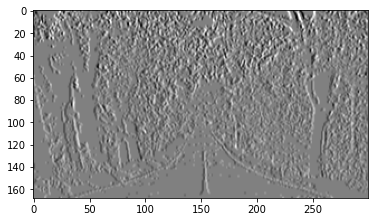

In [ ]:
plt.imshow(out_v,cmap='gray')
plt.show()

In [ ]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


Laplace Filter

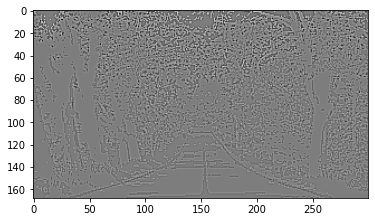

In [ ]:
out_lap = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_lap, cmap='gray')

#Image Segmentation based on Clustering

Here we will be using k-means clustering algorithm

(168, 300, 3)


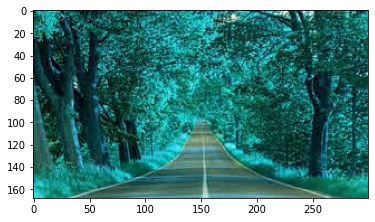

In [ ]:
pic = cv2.imread('/content/download.jfif')/255
print(pic.shape)
plt.imshow(pic)

In [ ]:
#first we convert it to 2d, so height*width, channels
pic_r = pic.reshape(pic.shape[0]*pic.shape[1],pic.shape[2])
pic_r.shape

(50400, 3)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_r)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

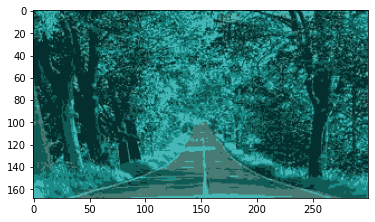

In [ ]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)